# Calculating Probabilities using Statistical Distributions
This notebook brings a few examples of how to calculate probabilities using statistical distributions and scipy.

In [1]:
import scipy.stats as scs
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

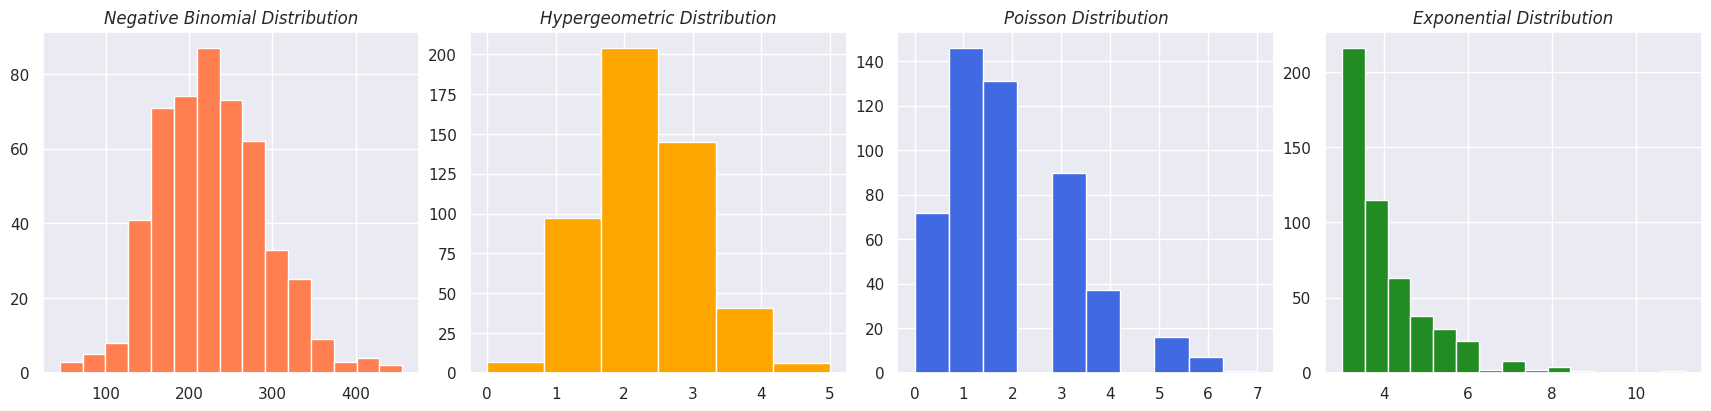

In [75]:
# Plot Mosaic
fig = plt.figure(layout= 'constrained', figsize=(17,4))
mosaic = fig.subplot_mosaic('''
                            abcd
                            ''')

# Plot A
mosaic['a'].hist(scs.nbinom.rvs(n=12, p=0.05, size=500),
                 color='coral', bins=15)

# Plot B
mosaic['b'].hist(scs.hypergeom.rvs(M=15, n=5, N=7, size=500),
                 color='orange', bins=6)

# Plot C
mosaic['c'].hist(scs.poisson.rvs(mu=2, size=500),
                 color='royalblue', bins=10)

# Plot D
mosaic['d'].hist(scs.expon.rvs(loc=3, scale=1, size=500),
                 color='forestgreen', bins=15);

# Define Titles
titles = ['Negative Binomial Distribution', 'Hypergeometric Distribution', 'Poisson Distribution', 'Exponential Distribution']

# Um titulo por plot
for ax, g_title in zip(mosaic.items(), titles):
    ax[1].set_title(g_title, fontstyle='italic');

In [60]:
# Binomial
'''A restaurant serves 150 meals every night. But there is always one trainee server in the house, and they generally serve 6 wrong plates in a night (6/150 = 4%).
What is the probability that the next night there will be a 99% success rate?'''
n = 150 # tries
p = 0.96 # probability of single success
k = 147  # Probability of success to be tested

prob_at_least_148_correct = 1 - scs.binom.cdf(k=k, n=n, p=p)
print(f"The probability of at least 148 correct meals served is: {prob_at_least_148_correct:.4f}")

The probability of at least 148 correct meals served is: 0.9967


Probability that I will sell for the 10th customer: 0.03151247048623046
0.03151247048623045


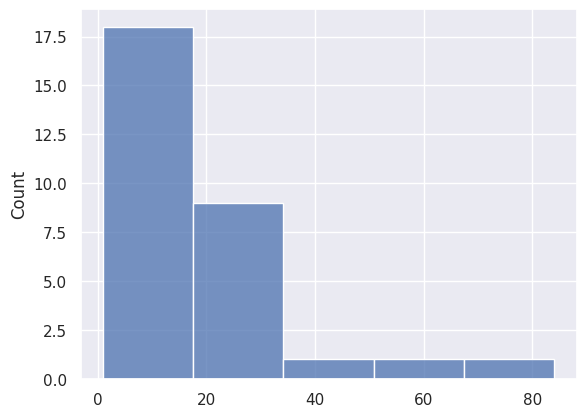

In [71]:
# Geometric distribution
# How many tries until the first success?

geom = scs.geom.rvs(p=0.05, size=30)

sns.histplot(geom, bins=5);

# Probability that I will sell for the 10th customer
tenth = scs.geom.cdf(10, p=0.05) - scs.geom.cdf(9, p=0.05)
print(f"Probability that I will sell for the 10th customer: {tenth}")

print(scs.geom.pmf(10, p=0.05))

In [41]:
# Negative Binomial
# Student gets 3 out of 5 right
p = 3/5

# How probable that the student can get 12 right out of 20 questions
# k is the number of failures in this method from scipy
# n is the number of successes
# p is the probability of success in each trial
neg_bin = scs.nbinom.pmf(k=20-12, n=12, p=p)
print(f"Probability that the student can get 12 right out of 20 questions: {neg_bin}")

Probability that the student can get 12 right out of 20 questions: 0.1078234726528136


In [121]:
from scipy.stats import nbinom

# Parameters
x = 80  # Total number of customers (trials)
k = 12  # Number of cars to be sold (successes)
p = 1 / 12  # Probability of selling a car

# Calculate probability
probability = nbinom.pmf(x - k, k, p)
print(probability)

0.002730404678917251


In [127]:
# Probability of selling a car
# p is the probability of success in each trial
p = 1/6

# Number of cars we need to sell
# n is the number of successes
n = 12

# Customers in the weekend
total_customers = 40 * 2

# k is the number of failures in this method from scipy
k = total_customers - n

# Probability of selling 12 cars
prob = scs.nbinom.pmf(k=k, n=n, p=p)

print(f"The probability of selling 12 cars this weekend is: {prob:.5f}")

The probability of selling at least 50 cars this weekend is: 0.01714


In [6]:
# Hypergeometric: In this distribution, as we take samples out, there is not reposition, so the population total decreases.
# In a bowl, there are 15 balls with 5 being red.

# Probability of drawing 7 balls getting 2 red balls
"M is the total number of objects, n is total number of Type I objects. The random variate represents the number of Type I objects in N drawn without replacement from the total population."
# k=success | M= total number of balls | n= red balls | N = draws
p = scs.hypergeom.pmf(k=2, M=15, n=5, N=7)
print(f"Probability of drawing 7 balls getting 2 red balls: {p}")

# Probability that at least two red balls are drawn
p = 1 - scs.hypergeom.cdf(k=1, M=15, n=5, N=7)
print(f"Probability that at least two red balls are drawn: {p}")

Probability of drawing 7 balls getting 2 red balls: 0.39160839160839156
Probability that at least two red balls are drawn: 0.8181818181818181


In [129]:
# Poisson Distribution
"Distribution by periods of time or space"
"In a production line, the probability of a defective piece is 0.01. If we produce 300 pieces, what is the probability of seeing no defective pieces?"
# events
k=0

# lambda, or the avg defects
mu=0.01*300

# Probability
p = scs.poisson.pmf(k, mu)
print(f"Probability of seeing no defective pieces: {p}")

Probability of seeing no defective pieces: 0.049787068367863944


In [140]:
# Poisson Distribution
"In a bank 10 people come by minute. What is the probability of 60 or more people coming in the next 5 minutes?"
# 60+ people in 5 minutes.
# So we calculate the acumulated up to 59 and deduct from our 100% probability
k=59

# lambda, or the people expected in the 5 minutes
mu=10*5

# Probability
p = 1-scs.poisson.cdf(k, mu)
print(f"Probability of seeing 60+ people in 5 minutes ({mu} expected): {p}")


Probability of seeing 60+ people in 5 minutes (50 expected): 0.09226505195893298


In [22]:
# Exponential Distribution: Used in system confiability and queueing theory
# Assessing the probability of a component to fail
"The lifetime of a component is 120 hours. What is the probability that it will fail in 100 hours?"

# lambda is the rate parameter, which is 1/mean
lambd = 1/120

# Calculate the probability using the CDF of the exponential distribution
p = scs.expon.cdf(100, scale=1/lambd)
print(f"Probability that the component will fail in 100 hours: {p}")

# Calculate the probability using the survival function (1 - CDF) of the exponential distribution
p = scs.expon.sf(150, scale=1/lambd)
print(f"Probability that the component lasts more than 150 hours: {p}")


Probability that the component will fail in 100 hours: 0.5654017914929218
Probability that the component lasts more than 150 hours: 0.2865047968601901


In [143]:
# Calculate the probability using the survival function (1 - CDF) of the exponential distribution
lambd = 1/120
p = 1- scs.expon.cdf(150, scale=1/lambd)
print(f"Probability that the component lasts more than 150 hours: {p}")

Probability that the component lasts more than 150 hours: 0.28650479686019015
